# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [89]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import seaborn as sns
np.random.seed(2360873)
N = 100

In [104]:
df = pd.read_csv('previsao_de_renda.csv')

In [91]:
df1 = df.drop(df[['Unnamed: 0','data_ref', 'index']], axis=1)
df2 = df1.corr()
df2

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


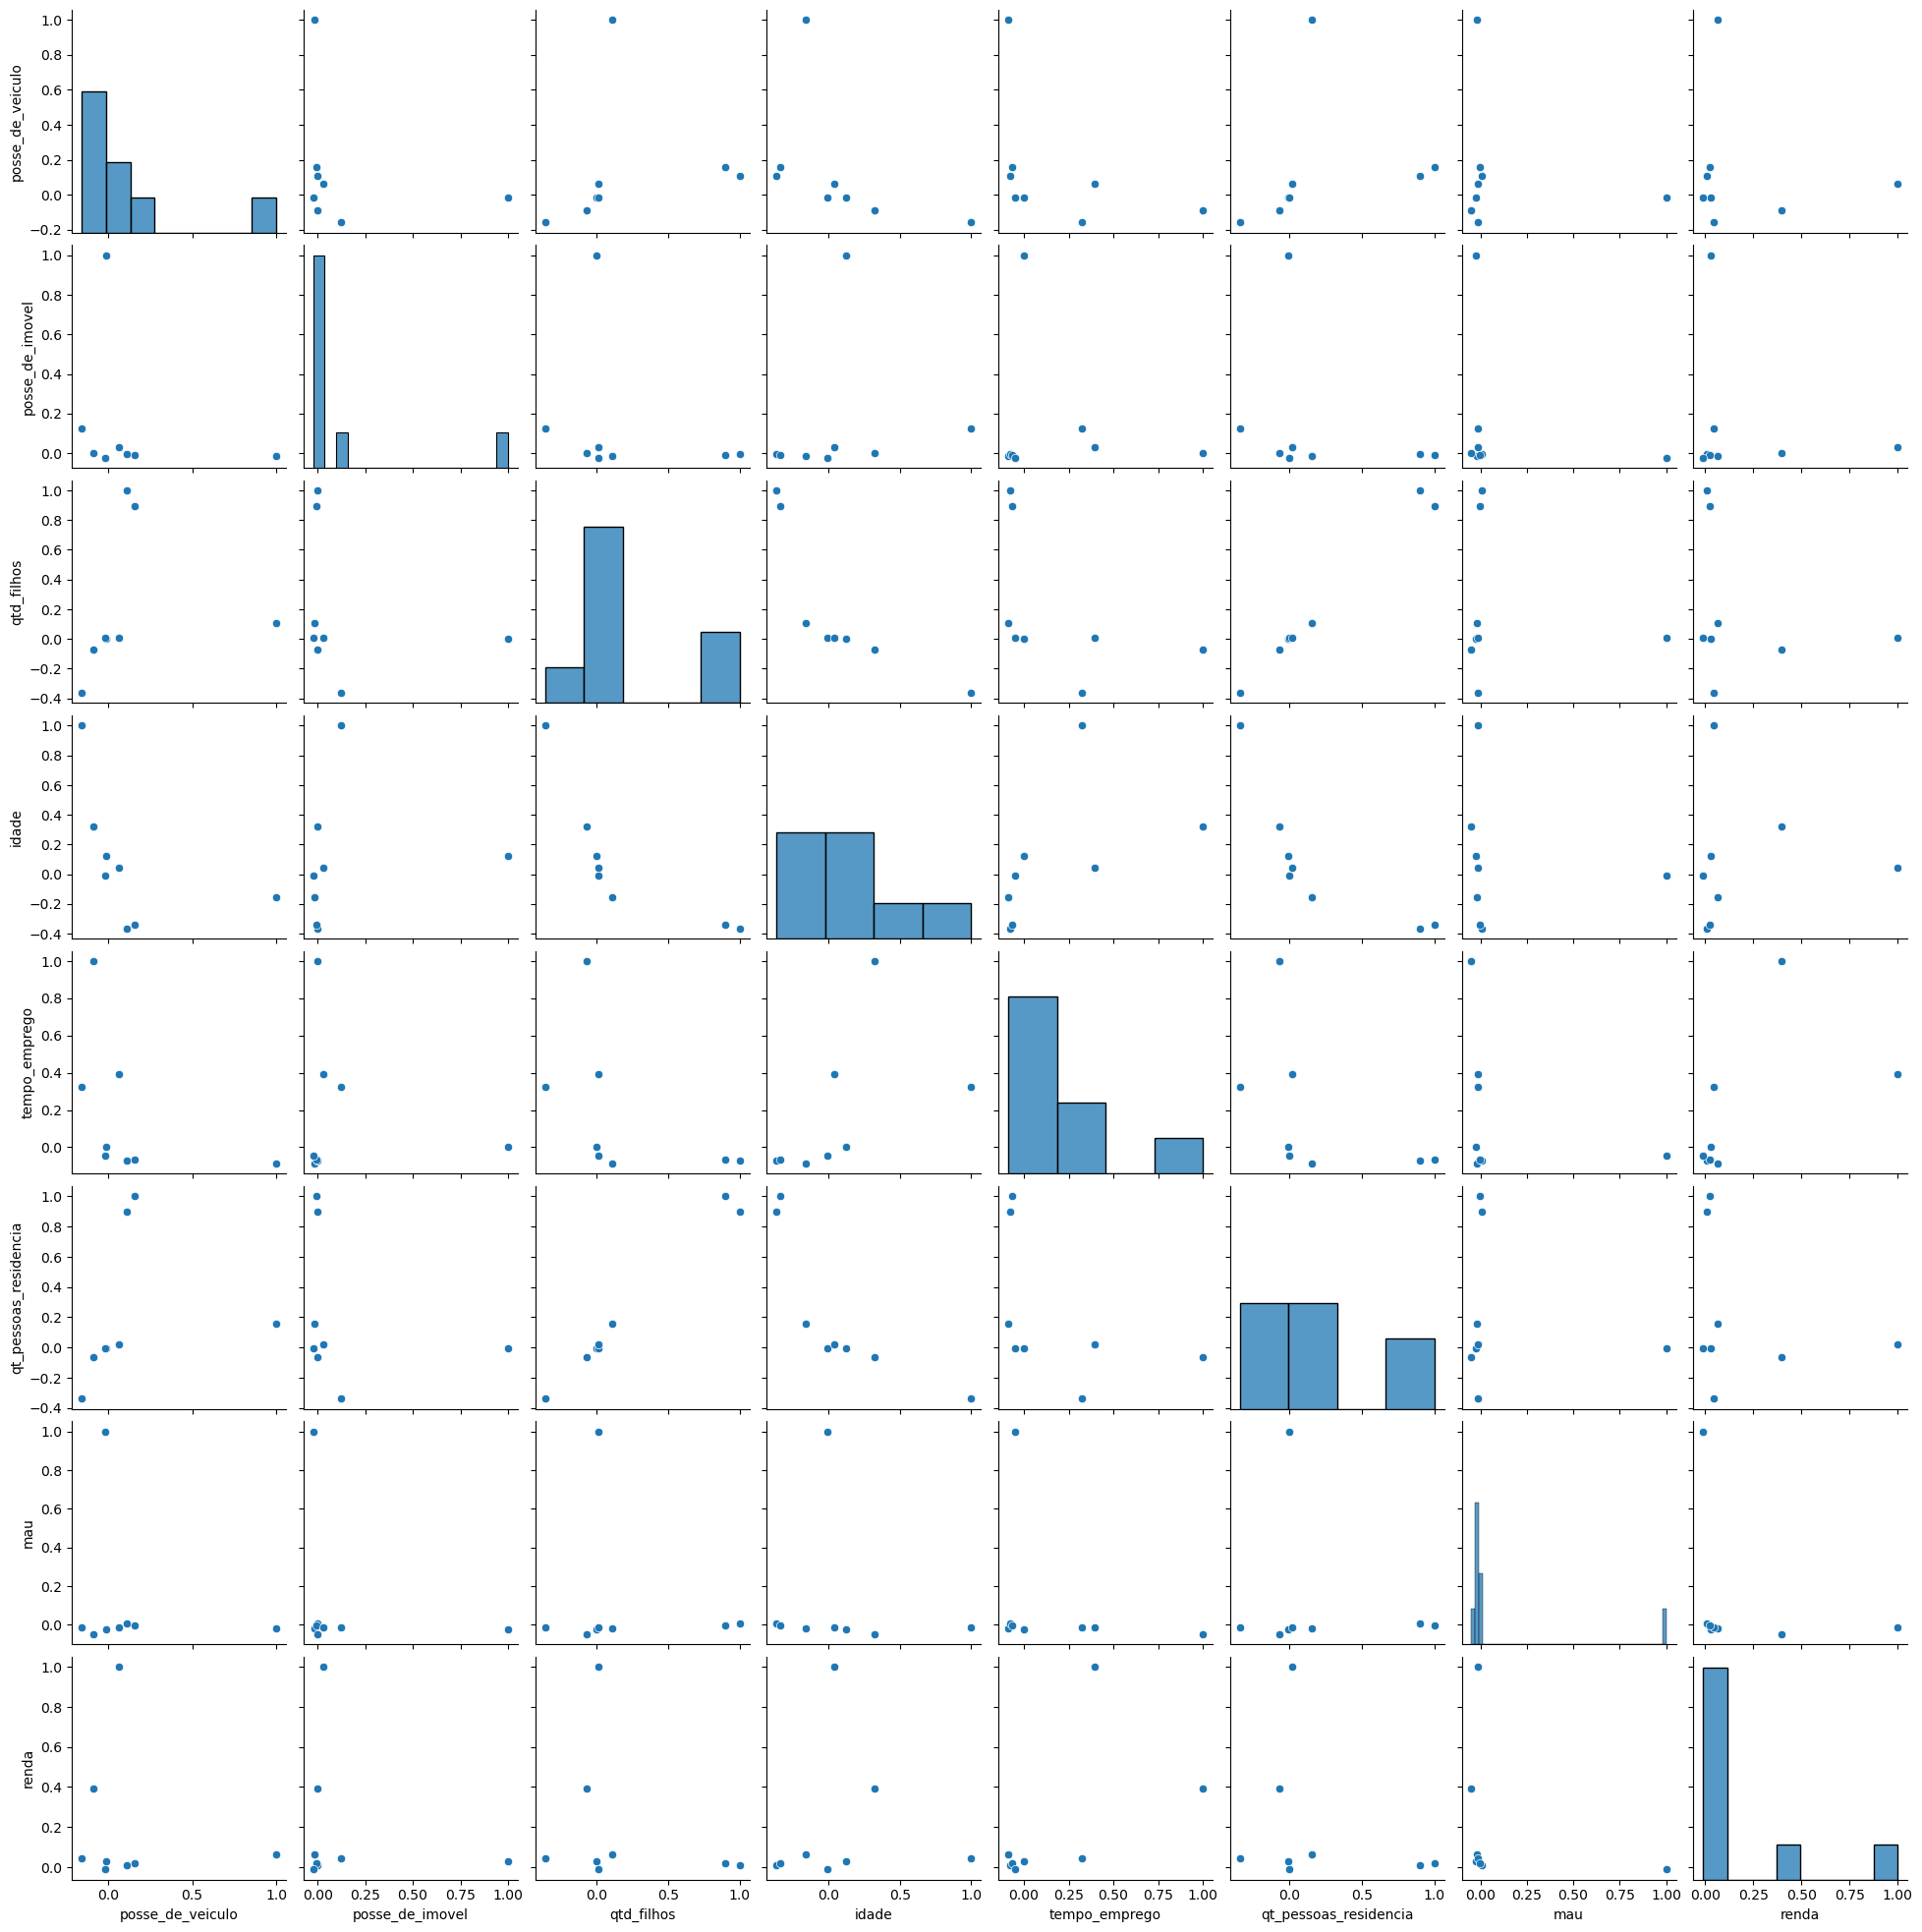

<Figure size 1500x1500 with 0 Axes>

In [92]:
sns.pairplot(df2)
plt.figure(figsize=(15, 15))
plt.show()

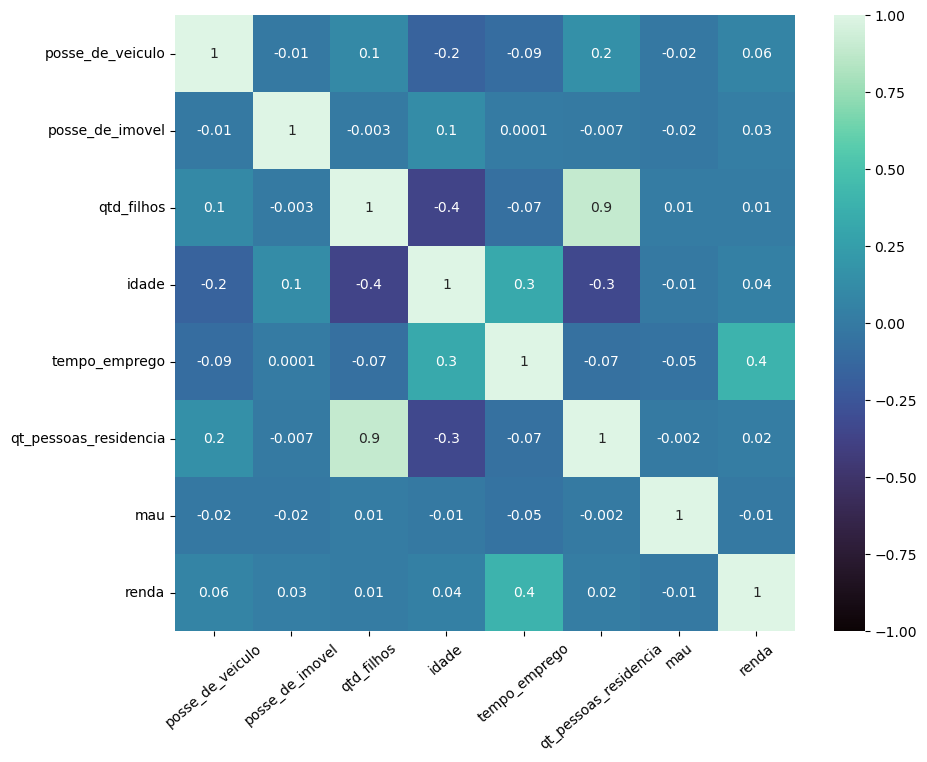

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2, annot=True, fmt='.1g', vmin=-1, vmax=1, cmap='mako', center=0)
plt.xticks(rotation = 40)
plt.show()

In [ ]:
# No caso em estudo a correlação entre 'qt_pessoas_residencia' e 'qtd_filhos'
# é a mais forte, sendo a que mais se aproxima de 1, seguida da correlação
# entre 'tempo_emprego' e 'renda' e 'idade' e 'renda'.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

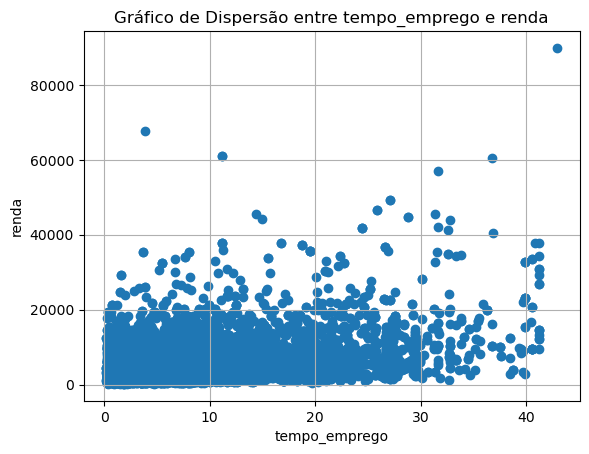

In [94]:
pyplot.scatter(x = 'tempo_emprego', y = 'renda', data = df1)
pyplot.title('Gráfico de Dispersão entre tempo_emprego e renda')
plt.xlabel('tempo_emprego')
plt.ylabel('renda')
plt.grid(True)
pyplot.show()

In [ ]:
# Para o caso em estudo a renda tende a diminuir após 25 anos de tempo de emprego.

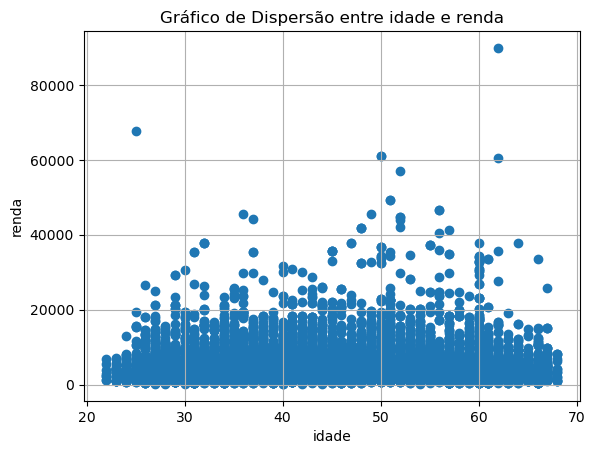

In [114]:
pyplot.scatter(x = 'idade', y = 'renda', data = df1)
pyplot.title('Gráfico de Dispersão entre idade e renda')
plt.xlabel('idade')
plt.ylabel('renda')
plt.grid(True)
pyplot.show()

In [ ]:
# Para o caso em estudo, entre as idades de 25 e 65 anos aproximadamente a renda 
# tende a permanecer constante, na faixa dos 20000.

3) Na su aopinião, há outliers na variável renda?

In [96]:
# Sim. Em ambos os gráficos é possível verificar pontos situados muito acima dos demais (acima da linha de 60000 de renda).

4) Calcule o logaritmo da variável renda e repita a sequência de análise

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.024712
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,0.379556
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.036267
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.014193
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.835734
log_renda,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.000000


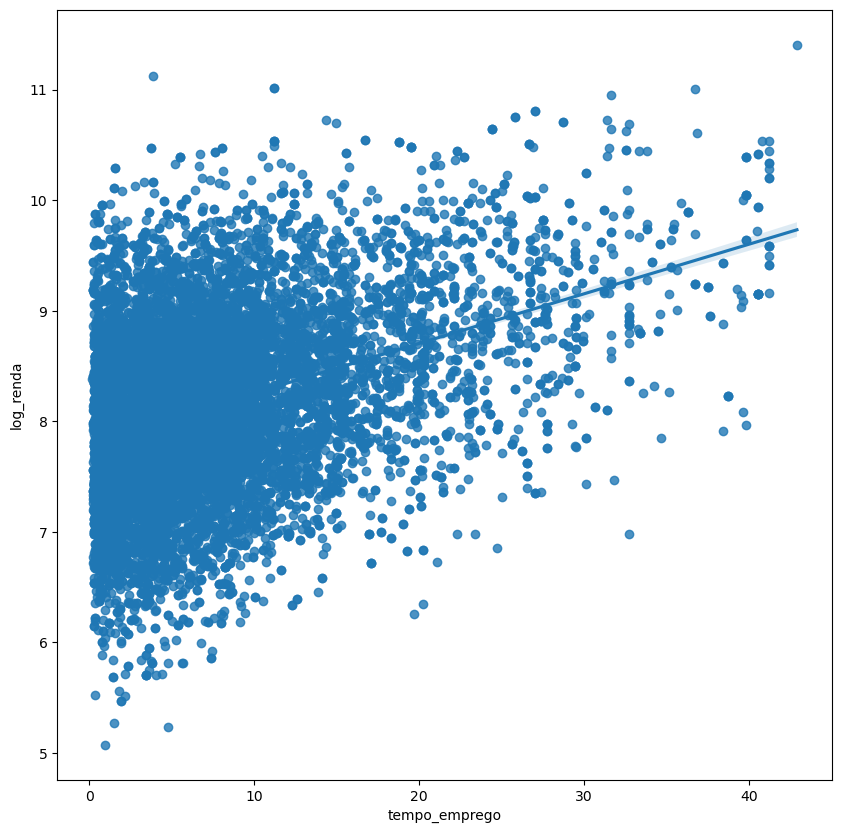

In [98]:
df1_log = df1.copy()
df1_log['log_renda'] = np.log(df1_log['renda'])
plt.figure(figsize=(10,10))
_ = sns.regplot(x='tempo_emprego', y='log_renda', data = df1_log)
df1_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.024712
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,0.379556
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.036267
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.014193
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.835734
log_renda,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.000000


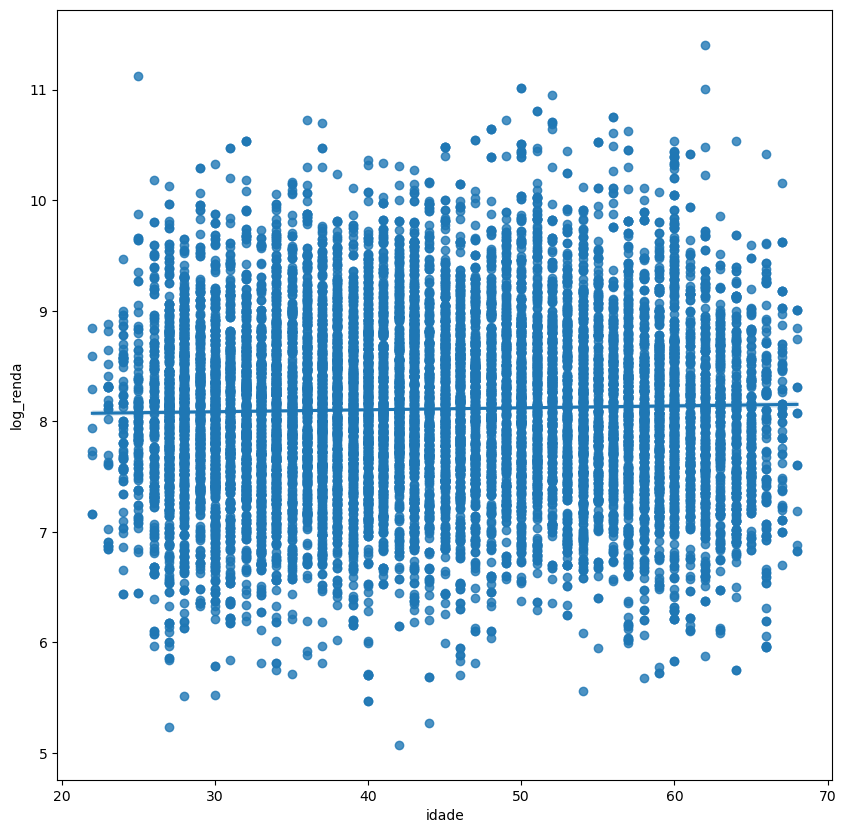

In [109]:
df1_log = df1.copy()
df1_log['log_renda'] = np.log(df_log['renda'])
plt.figure(figsize=(10,10))
_ = sns.regplot(x='idade', y='log_renda', data = df1_log)
df1_log.corr()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
# No caso em estudo a aplicação de LOG não trouxe benefícios para a análise dos dados.